In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 2, n_output = 2 

In [3]:
m = n_input = 2
s = n_output = 2

In [4]:
np.random.seed(0)
x_min = np.random.uniform(1,10, m+s)
x_min

array([5.94, 7.44, 6.42, 5.9 ])

In [5]:
np.random.seed(4)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([967.06, 547.69, 972.71, 715.1 ])

In [6]:
x_max = x_min + delta_x
x_max

array([973.  , 555.12, 979.14, 721.01])

In [7]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([489.47, 281.28, 492.78, 363.45])

In [8]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([161.18,  91.28, 162.12, 119.18])

In [9]:
np.random.seed(0)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [10]:
std_list

[88.45618813682478, 65.28308337122745, 97.71916225532115, 64.94110097658067]

In [11]:
cov_matrix_int = []

for i in range(m + s):
    for j in range(m + s):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [12]:
cov_matrix_int

[(0, 1, -5774.692704837313, 5774.692704837313),
 (0, 2, -8643.864601029594, 8643.864601029594),
 (0, 3, -5744.442245796955, 5744.442245796955),
 (1, 2, -6379.408216480633, 6379.408216480633),
 (1, 3, -4239.555309273416, 4239.555309273416),
 (2, 3, -6345.989983369682, 6345.989983369682)]

In [13]:
len(cov_matrix_int)

6

In [14]:
cov_list = []
np.random.seed(1)

for i, el in enumerate(cov_matrix_int):
    n = np.random.uniform(el[2],el[3])
#    print(i)
#    if i>(len(cov_matrix_int)/2)-1:
#        if (cov_list[el[0]-1] * cov_list[el[1]-1] < 0) and  n < 0:
#            n = n   
#        else:
#            n=-n
    cov_list.append(n)
cov_list

[-958.3448482121412,
 3808.910179208895,
 -5743.1282067317325,
 -2522.00242056606,
 -2995.1958771117334,
 -5174.030388407236]

In [15]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

4


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[ 7824.5   -958.34  3808.91 -5743.13]
 [ -958.34  4261.88 -2522.   -2995.2 ]
 [ 3808.91 -2522.    9549.03 -5174.03]
 [-5743.13 -2995.2  -5174.03  4217.35]]


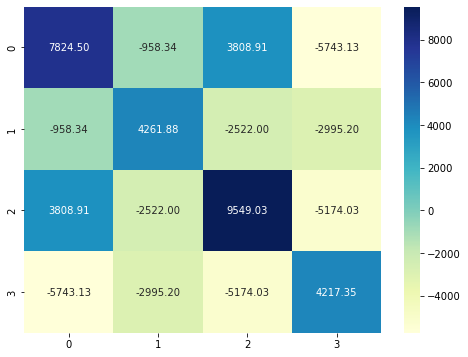

In [17]:
plt.figure(figsize = (8,6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [18]:
mask = np.triu(np.ones_like(cov_matrix, dtype=bool))
# mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [19]:
pd.DataFrame(cov_matrix).mask(~mask).T

,0,1,2,3
0,7824.497220,NaN,NaN,NaN
1,-958.344848,4261.880974,NaN,NaN
2,3808.910179,-2522.002421,9549.034672,NaN
3,-5743.128207,-2995.195877,-5174.030388,4217.346596


In [20]:
pd.DataFrame(cov_matrix).mask(mask).to_numpy()

array([[     nan,      nan,      nan,      nan],
       [ -958.34,      nan,      nan,      nan],
       [ 3808.91, -2522.  ,      nan,      nan],
       [-5743.13, -2995.2 , -5174.03,      nan]])

In [21]:
my_colorsc=[[0, '#2effd7'],#white
            [1, '#006a55']]

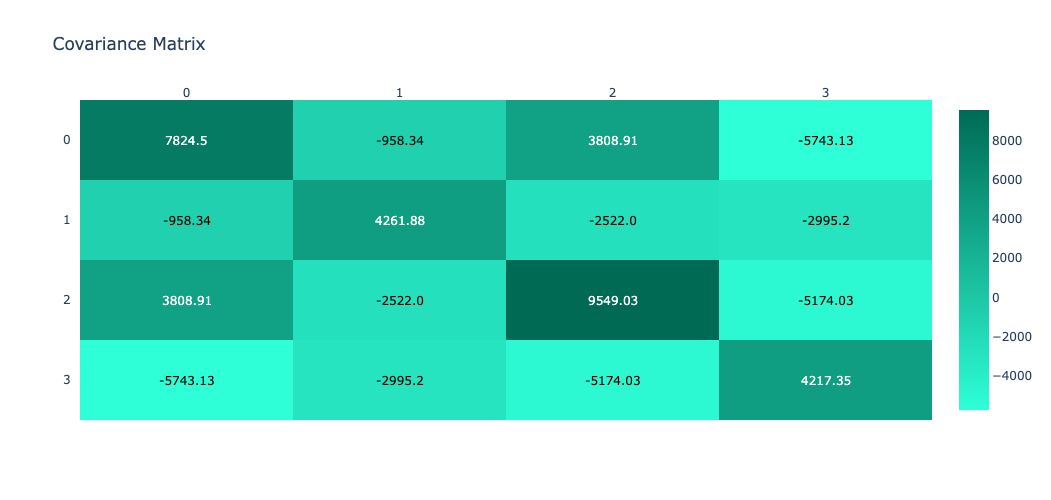

In [22]:
fig = ff.create_annotated_heatmap(pd.DataFrame(cov_matrix).to_numpy().T.round(2),
                                  x = pd.DataFrame(cov_matrix).columns.tolist(),
                                  y = pd.DataFrame(cov_matrix).columns.tolist(),
                                  showscale=True, colorscale=my_colorsc )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Covariance Matrix",
        xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

In [23]:
US_22 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
US_22.columns = ["Input " + str(i + 1) for i in range(m)] + ["Output " + str(i + 1) for i in range(s)]
US_22.index = ["DMU " + str(i + 1) for i in range(len(US_22))]
US_22 = US_22.round(2)
US_22

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_65236/2917725350.py:1: RuntimeWarning:

covariance is not positive-semidefinite.



,Input 1,Input 2,Output 1,Output 2
DMU 1,508.49,291.16,644.74,441.73
DMU 2,332.53,260.31,389.95,509.59
DMU 3,359.05,161.13,445.83,548.45
DMU 4,404.83,236.18,448.47,510.64
DMU 5,527.84,258.88,411.59,316.40
...,...,...,...,...
DMU 996,559.37,259.14,505.48,290.69
DMU 997,547.45,271.88,560.57,286.12
DMU 998,617.70,278.44,613.57,174.75
DMU 999,604.74,261.34,546.23,358.84


In [24]:
(US_22<=0).sum()

Input 1     0
Input 2     0
Output 1    0
Output 2    0
dtype: int64

In [25]:
US_22.to_excel("Data/US22.xlsx")

### Structured Variance, n_input = 2, n_output = 2

In [26]:
m = n_input = 2
s = n_output = 2

In [27]:
np.random.seed(5)
x_min = np.random.uniform(1,10, m+s, )
x_min

array([3.  , 8.84, 2.86, 9.27])

In [28]:
np.random.seed(5)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([222.77, 870.86, 207.51, 918.69])

In [29]:
x_max = x_min + delta_x
x_max

array([225.77, 879.7 , 210.37, 927.96])

In [30]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([114.38, 444.27, 106.62, 468.61])

In [31]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([ 37.13, 145.14,  34.59, 153.12])

In [32]:
np.random.seed(5)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [33]:
std_list

[8.242280035592934, 126.38121776302144, 7.149465921733515, 140.65346084838131]

In [34]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

4


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [35]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = 0
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l])
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[   67.94     0.       0.       0.  ]
 [    0.   15972.21     0.       0.  ]
 [    0.       0.      51.11     0.  ]
 [    0.       0.       0.   19783.4 ]]


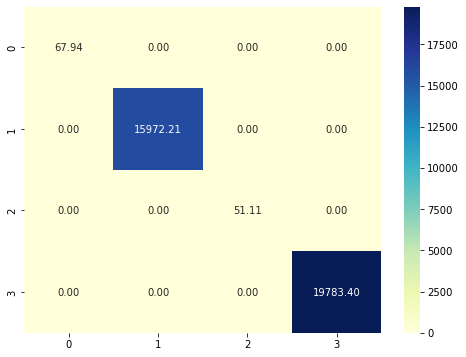

In [36]:
plt.figure(figsize = (8,6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

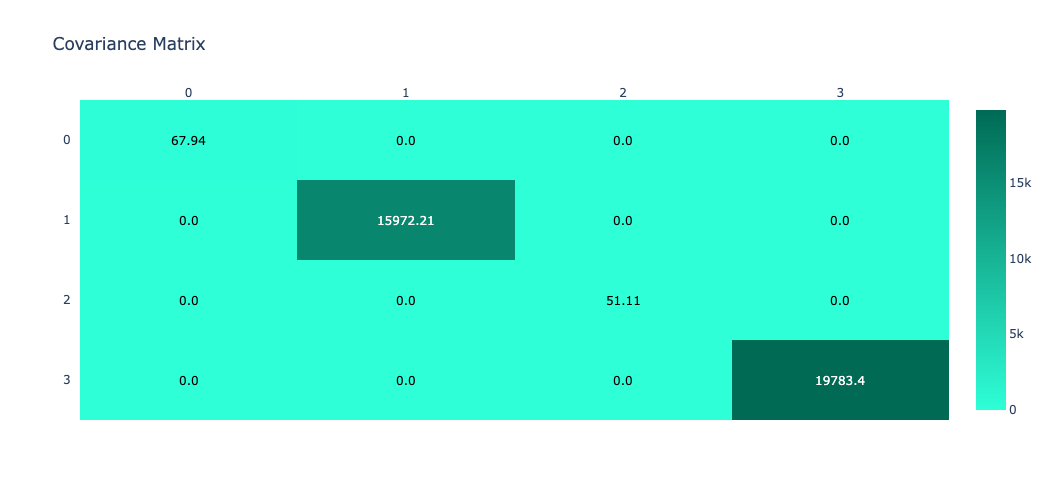

In [37]:
fig = ff.create_annotated_heatmap(pd.DataFrame(cov_matrix).to_numpy().T.round(2),
                                  x = pd.DataFrame(cov_matrix).columns.tolist(),
                                  y = pd.DataFrame(cov_matrix).columns.tolist(),
                                  showscale=True, colorscale=my_colorsc )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Covariance Matrix",
        xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

In [38]:
np.cov(np.random.multivariate_normal(mean_q, cov_matrix, 1000).T)

array([[   68.27,    10.76,     4.03,   -17.5 ],
       [   10.76, 15586.81,    37.12,  -450.21],
       [    4.03,    37.12,    52.31,     1.55],
       [  -17.5 ,  -450.21,     1.55, 21638.97]])

In [39]:
np.random.seed(1)
S_22 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
S_22.columns = ["Input " + str(i + 1) for i in range(m)] + ["Output " + str(i + 1) for i in range(s)]
S_22.index = ["DMU " + str(i + 1) for i in range(len(S_22))]
S_22 = S_22.round(2)
S_22 

,Input 1,Input 2,Output 1,Output 2
DMU 1,110.03,366.95,98.95,697.08
DMU 2,128.76,153.40,101.17,590.34
DMU 3,126.43,412.75,91.89,513.49
DMU 4,123.73,395.73,98.75,423.26
DMU 5,114.73,333.32,110.78,444.36
...,...,...,...,...
DMU 996,108.97,779.45,108.62,449.08
DMU 997,107.07,536.50,107.17,383.14
DMU 998,98.89,496.85,110.73,478.94
DMU 999,107.83,593.94,105.72,482.97


In [40]:
(S_22<=0).sum()

Input 1     0
Input 2     0
Output 1    0
Output 2    0
dtype: int64

In [41]:
S_22.to_excel("Data/S22.xlsx")

### Unstructured Variance, n_input = 5, n_output = 5 

In [42]:
m = n_input = 5
s = n_output = 5

In [43]:
np.random.seed(0)
x_min = np.random.uniform(1,10, m+s, )
x_min

array([5.94, 7.44, 6.42, 5.9 , 4.81, 6.81, 4.94, 9.03, 9.67, 4.45])

In [44]:
np.random.seed(0)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([549.26, 715.47, 603.16, 545.34, 424.23, 646.25, 438.15, 891.88, 963.7 , 384.06])

In [45]:
x_max = x_min + delta_x
x_max

array([555.2 , 722.91, 609.59, 551.24, 429.04, 653.06, 443.09, 900.91, 973.37, 388.51])

In [46]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([280.57, 365.17, 308.01, 278.57, 216.93, 329.94, 224.01, 454.97, 491.52, 196.48])

In [47]:
std_max = (x_max - x_min) * 0.5 * (1/3.3)
std_max

array([ 83.22, 108.41,  91.39,  82.63,  64.28,  97.92,  66.39, 135.13, 146.02,  58.19])

In [48]:
np.random.seed(0)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [49]:
std_list

[45.67331505073061,
 77.53023080436108,
 55.08532230633703,
 45.02207100192635,
 27.231448547458125,
 63.24362427302044,
 29.049798803706413,
 120.50842406662626,
 140.70923224560437,
 22.31269886058873]

In [50]:
cov_matrix_int = []

for i in range(m + s):
    for j in range(m + s):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [51]:
cov_matrix_int[:10]

[(0, 1, -3541.0626574834428, 3541.0626574834428),
 (0, 2, -2515.9292803683693, 2515.9292803683693),
 (0, 3, -2056.307233107345, 2056.307233107345),
 (0, 4, -1243.7505287958154, 1243.7505287958154),
 (0, 5, -2888.545976371696, 2888.545976371696),
 (0, 6, -1326.80061292202, 1326.80061292202),
 (0, 7, -5504.019218662068, 5504.019218662068),
 (0, 8, -6426.657094899911, 6426.657094899911),
 (0, 9, -1019.0949246917469, 1019.0949246917469),
 (1, 2, -4270.7777523429295, 4270.7777523429295)]

In [52]:
cov_list = []
np.random.seed(0)

for i in cov_matrix_int:
    n = np.random.uniform(i[2],i[3])
    cov_list.append(n)
cov_list[:5]

[345.7033518759422,
 1082.8024553605733,
 422.62614702930296,
 111.64696517285961,
 -441.053244369793]

In [53]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

10


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [54]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
print(cov_matrix)

[[ 2086.05   345.7   1082.8    422.63   111.65  -441.05   387.14  -687.04  5035.58   945.03]
 [  345.7   6010.94  -995.59  2036.57   122.01   667.28  1917.09 -8015.66 -9008.19 -1659.96]
 [ 1082.8   -995.59  3034.39  1649.83   834.5   2578.09  1531.79  3971.78  -597.15   689.6 ]
 [  422.63  2036.57  1649.83  2026.99  -936.     796.81  -932.9   4825.14   276.82  -171.46]
 [  111.65   122.01   834.5   -936.     741.55  -810.97   433.88  -287.8    524.44  -584.77]
 [ -441.05   667.28  2578.09   796.81  -810.97  3999.76   432.24  1708.65  2081.18  1252.38]
 [  387.14  1917.09  1531.79  -932.9    433.88   432.24   843.89  1273.01 -1148.54   -81.63]
 [ -687.04 -8015.66  3971.78  4825.14  -287.8   1708.65  1273.01 14522.28  6702.33 -2364.99]
 [ 5035.58 -9008.19  -597.15   276.82   524.44  2081.18 -1148.54  6702.33 19799.09  1047.16]
 [  945.03 -1659.96   689.6   -171.46  -584.77  1252.38   -81.63 -2364.99  1047.16   497.86]]


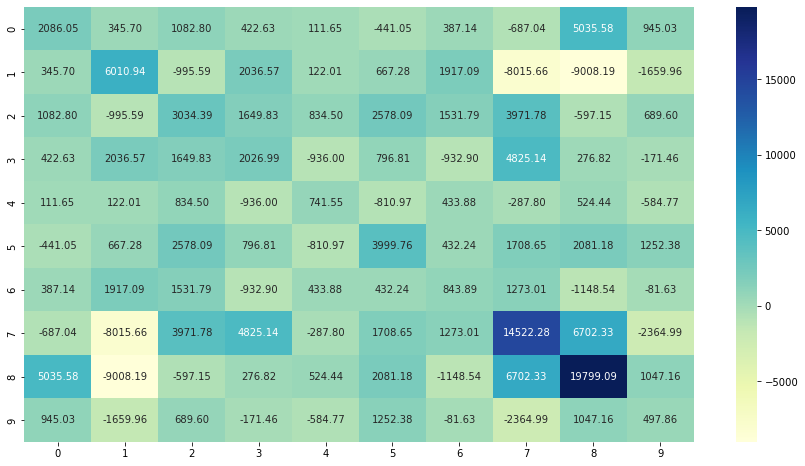

In [55]:
plt.figure(figsize = (15,8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

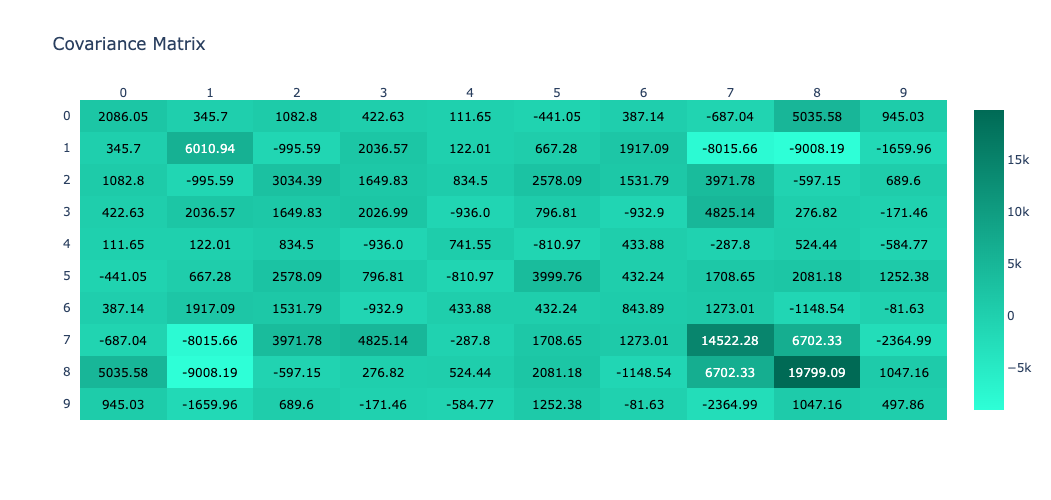

In [56]:
fig = ff.create_annotated_heatmap(pd.DataFrame(cov_matrix).to_numpy().T.round(2),
                                  x = pd.DataFrame(cov_matrix).columns.tolist(),
                                  y = pd.DataFrame(cov_matrix).columns.tolist(),
                                  showscale=True, colorscale=my_colorsc )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Covariance Matrix",
        xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

In [57]:
US_55 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
US_55.columns = ["Input " + str(i + 1) for i in range(m)] + ["Output " + str(i + 1) for i in range(s)]
US_55.index = ["DMU " + str(i + 1) for i in range(len(US_55))]
US_55 = US_55.round(2)
US_55 

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_65236/4285728368.py:1: RuntimeWarning:

covariance is not positive-semidefinite.



,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,262.93,368.02,311.81,369.14,158.95,373.54,165.68,625.17,620.95,193.29
DMU 2,267.81,449.71,300.84,194.85,195.14,312.06,154.78,360.41,510.36,291.05
DMU 3,315.52,467.64,249.35,285.36,251.24,224.69,214.17,333.71,378.87,180.60
DMU 4,273.62,219.07,245.76,379.23,164.55,345.12,200.72,466.64,560.33,172.56
DMU 5,323.65,298.21,369.23,380.81,117.59,406.04,218.08,513.41,583.01,152.26
...,...,...,...,...,...,...,...,...,...,...
DMU 996,278.92,497.34,292.40,263.17,253.21,349.98,194.55,220.20,296.03,221.31
DMU 997,302.55,554.88,339.71,409.44,163.39,378.89,279.95,437.76,463.17,138.70
DMU 998,288.62,519.41,302.51,257.01,243.24,275.98,274.91,275.49,340.32,211.50
DMU 999,347.93,329.13,187.08,195.77,257.11,293.60,188.74,248.37,516.16,298.74


In [58]:
(US_55<=0).sum()

Input 1     0
Input 2     0
Input 3     0
Input 4     0
Input 5     0
Output 1    0
Output 2    0
Output 3    0
Output 4    0
Output 5    0
dtype: int64

In [59]:
US_55.to_excel("Data/US55.xlsx")

### Structured Variance, n_input = 5, n_output = 5

In [60]:
m = n_input = 5
s = n_output = 5

In [61]:
np.random.seed(16)
x_min = np.random.uniform(1,10, m+s, )
x_min

array([3.01, 5.71, 5.96, 1.41, 4.25, 3.01, 7.2 , 2.47, 1.63, 9.47])

In [62]:
np.random.seed(16)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([224.07, 523.64, 551.15,  46.56, 361.37, 223.86, 689.04, 164.57,  71.25, 941.07])

In [63]:
x_max = x_min + delta_x
x_max

array([227.08, 529.35, 557.11,  47.97, 365.61, 226.87, 696.24, 167.04,  72.89, 950.54])

In [64]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([115.04, 267.53, 281.53,  24.69, 184.93, 114.94, 351.72,  84.76,  37.26, 480.  ])

In [65]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([ 37.34,  87.27,  91.86,   7.76,  60.23,  37.31, 114.84,  27.43,  11.88, 156.84])

In [66]:
np.random.seed(13)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [67]:
std_list

[29.04300981956555,
 20.7310211259165,
 75.71695595155174,
 7.493625986871269,
 58.57783715394776,
 16.918029747559075,
 69.94217612479981,
 21.271101635912473,
 7.619644163760224,
 113.24493108419398]

In [68]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

10


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [69]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = 0
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l])
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[  843.5      0.       0.       0.       0.       0.       0.       0.       0.       0.  ]
 [    0.     429.78     0.       0.       0.       0.       0.       0.       0.       0.  ]
 [    0.       0.    5733.06     0.       0.       0.       0.       0.       0.       0.  ]
 [    0.       0.       0.      56.15     0.       0.       0.       0.       0.       0.  ]
 [    0.       0.       0.       0.    3431.36     0.       0.       0.       0.       0.  ]
 [    0.       0.       0.       0.       0.     286.22     0.       0.       0.       0.  ]
 [    0.       0.       0.       0.       0.       0.    4891.91     0.       0.       0.  ]
 [    0.       0.       0.       0.       0.       0.       0.     452.46     0.       0.  ]
 [    0.       0.       0.       0.       0.       0.       0.       0.      58.06     0.  ]
 [    0.       0.       0.       0.       0.       0.       0.       0.       0.   12824.41]]


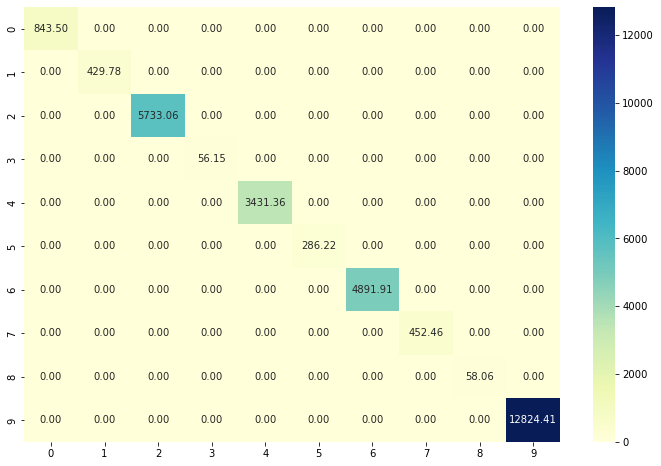

In [70]:
plt.figure(figsize = (12,8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

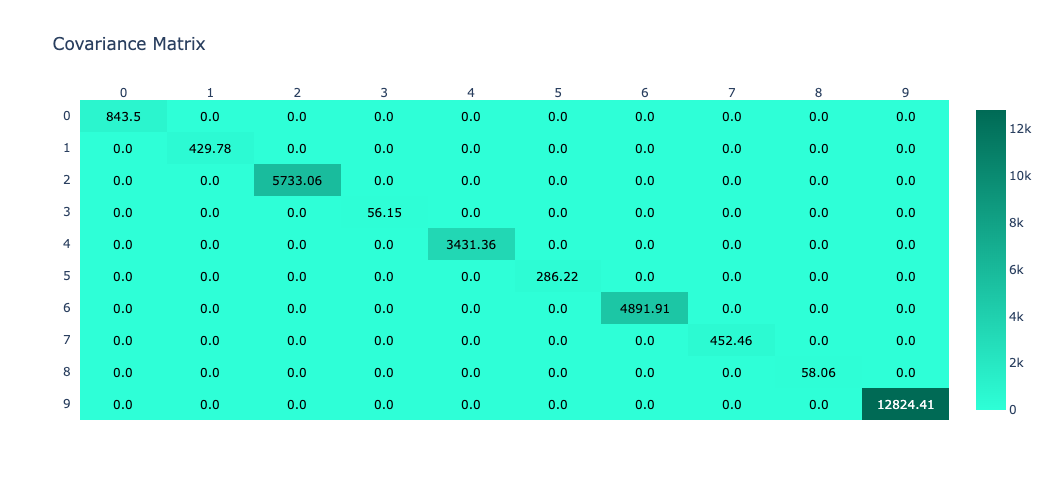

In [71]:
fig = ff.create_annotated_heatmap(pd.DataFrame(cov_matrix).to_numpy().T.round(2),
                                  x = pd.DataFrame(cov_matrix).columns.tolist(),
                                  y = pd.DataFrame(cov_matrix).columns.tolist(),
                                  showscale=True, colorscale=my_colorsc )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Covariance Matrix",
        xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

In [72]:
np.random.seed(1)
S_55 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
S_55.columns = ["Input " + str(i + 1) for i in range(m)] + ["Output " + str(i + 1) for i in range(s)]
S_55.index = ["DMU " + str(i + 1) for i in range(len(S_55))]
S_55 = S_55.round(2)
S_55 

,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,140.18,303.70,235.21,22.82,122.08,102.06,314.78,35.80,39.69,663.95
DMU 2,147.97,263.95,125.54,29.06,162.43,100.09,329.17,61.36,37.58,645.58
DMU 3,141.21,264.98,368.21,28.66,214.37,99.11,414.78,70.21,35.22,355.36
DMU 4,95.55,244.37,251.49,30.25,135.42,118.90,303.65,84.49,49.91,401.68
DMU 5,116.52,271.49,214.32,29.31,284.07,150.47,299.46,71.21,38.18,458.28
...,...,...,...,...,...,...,...,...,...,...
DMU 996,72.58,281.46,318.09,17.55,201.11,123.54,354.28,71.85,44.15,521.31
DMU 997,137.93,310.10,186.79,33.34,227.43,125.90,402.54,109.74,29.74,543.22
DMU 998,124.73,244.29,361.03,25.21,153.04,108.02,415.22,82.17,47.21,618.13
DMU 999,135.27,277.19,164.68,27.25,168.68,142.44,396.28,75.65,32.17,297.65


In [73]:
(S_55<=0).sum()

Input 1     0
Input 2     0
Input 3     0
Input 4     0
Input 5     0
Output 1    0
Output 2    0
Output 3    0
Output 4    0
Output 5    0
dtype: int64

In [74]:
S_55.to_excel("Data/S55.xlsx")